In [73]:
%matplotlib widget

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from pathlib import Path

from CWpreprocessing import CSVtoSQLite


In [74]:
CSV_FOLDER = Path(r"E:\Python\Project\CWdatafiles")


In [75]:
CSVtoSQLite.clean_counter = 0

if not CSV_FOLDER.exists():
    raise FileNotFoundError(f"Folder not found: {CSV_FOLDER}")

csv_files = list(CSV_FOLDER.glob("*.csv"))

if not csv_files:
    raise FileNotFoundError("No CSV files found")

for csv in csv_files:
    CSVtoSQLite(csv).convert()

print(f"✔ {len(csv_files)} CSV files processed")
print("✔ Database created: CWDatabase.db")


✔ 7 CSV files processed
✔ Database created: CWDatabase.db


In [76]:
DB_PATH = "CWDatabase.db"

def list_tables():
    conn = sqlite3.connect(DB_PATH)
    tables = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table'",
        conn
    )
    conn.close()
    return tables["name"].tolist()


In [77]:

def load_table(table_name):
    conn = sqlite3.connect(DB_PATH)
    df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
    conn.close()
    return df


In [78]:
##DEGUG CELL##

DB_PATH = "CWDatabase.db"

conn = sqlite3.connect(DB_PATH)
tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table'",
    conn
)
conn.close()

tables
##DEGUG CELL##

,name
0,Formative_Mock_Test_dfCleanTest_1
1,Formative_Mock_Test_dfFormattedCleanTest_1
2,Formative_Mock_Test_dftest_1
3,Formative_Test_1_dfCleanTest_2
4,Formative_Test_1_dfFormattedCleanTest_2
5,Formative_Test_1_dftest_2
6,Formative_Test_2_dfCleanTest_3
7,Formative_Test_2_dfFormattedCleanTest_3
8,Formative_Test_2_dftest_3
9,Formative_Test_3_dfCleanTest_4


In [79]:

formatted_tables = tables["name"][
    tables["name"].str.contains("dfFormattedCleanTest")
].tolist()

formatted_tables




['Formative_Mock_Test_dfFormattedCleanTest_1',
 'Formative_Test_1_dfFormattedCleanTest_2',
 'Formative_Test_2_dfFormattedCleanTest_3',
 'Formative_Test_3_dfFormattedCleanTest_4',
 'Formative_Test_4_dfFormattedCleanTest_5',
 'StudentRate_dfFormattedCleanTest_6',
 'SumTest_dfFormattedCleanTest_7']

In [80]:
sum_table = next(t for t in formatted_tables if "Sum" in t)

conn = sqlite3.connect(DB_PATH)
df_sum = pd.read_sql(f"SELECT * FROM '{sum_table}'", conn)
conn.close()

df_sum.head()


,researchid,State,Startedon,Completed,Timetaken,Grade10000,Q1500,Q2300,Q3600,Q4700,Q5400,Q6500,Q71500,Q81500,Q91500,Q101000,Q11400,Q12500,Q13600
0,40,Finished,14 November 2018 9:39 AM,14 November 2018 10:55 AM,1 hour 16 mins,68.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,40.0,100.0,0.0,0.0
1,117,Finished,14 November 2018 9:39 AM,14 November 2018 10:54 AM,1 hour 15 mins,55.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
2,34,Finished,14 November 2018 9:39 AM,14 November 2018 10:55 AM,1 hour 16 mins,56.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0
3,156,Finished,14 November 2018 9:50 AM,14 November 2018 10:51 AM,1 hour 1 min,64.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,0.0,100.0,0.0,0.0
4,92,Finished,14 November 2018 9:50 AM,14 November 2018 10:46 AM,55 mins 34 secs,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [81]:
df_sum.columns


Index(['researchid', 'State', 'Startedon', 'Completed', 'Timetaken',
       'Grade10000', 'Q1500', 'Q2300', 'Q3600', 'Q4700', 'Q5400', 'Q6500',
       'Q71500', 'Q81500', 'Q91500', 'Q101000', 'Q11400', 'Q12500', 'Q13600'],
      dtype='object')

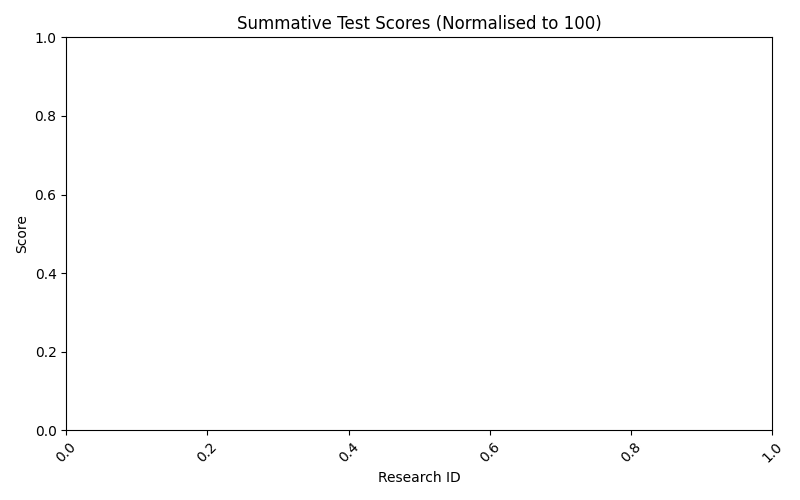

In [82]:
plt.figure(figsize=(8,5))
df_sum = df_sum.rename(columns={df_sum.columns[0]: "student_id"})
plt.title("Summative Test Scores (Normalised to 100)")
plt.xlabel("Research ID")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [83]:
def get_formatted_tables():
    conn = sqlite3.connect(DB_PATH)
    tables = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table'",
        conn
    )
    conn.close()

    return tables["name"][
        tables["name"].str.contains("dfFormattedCleanTest")
    ].tolist()


def load_table(table_name):
    conn = sqlite3.connect(DB_PATH)
    df = pd.read_sql(f"SELECT * FROM '{table_name}'", conn)
    conn.close()
    return df


In [84]:
def plot_table(table_name, title):
    df = load_table(table_name)

    if "student_id" not in df.columns or "score" not in df.columns:
        print("Required columns not found")
        return

    plt.figure(figsize=(9,5))
    plt.bar(df["student_id"], df["score"])
    plt.title(title)
    plt.xlabel("Student ID")
    plt.ylabel("Score (Normalised to 100)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


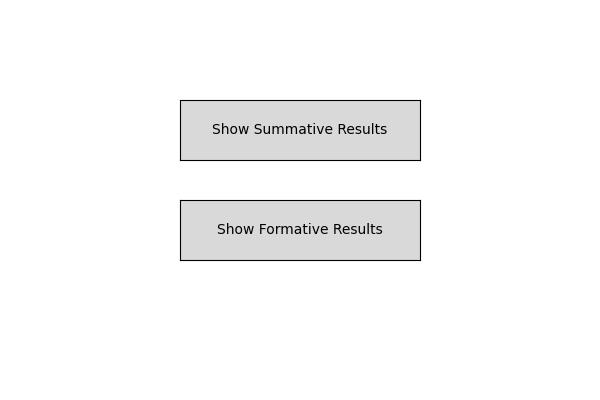

RuntimeError: Another Axes already grabs mouse input

RuntimeError: Another Axes already grabs mouse input

In [85]:
from matplotlib.widgets import Button

formatted_tables = get_formatted_tables()

sum_table = next(t for t in formatted_tables if "Sum" in t)
formative_tables = [t for t in formatted_tables if "Sum" not in t]

fig, ax = plt.subplots(figsize=(6,4))
ax.axis("off")

ax_sum = plt.axes([0.3, 0.6, 0.4, 0.15])
ax_form = plt.axes([0.3, 0.35, 0.4, 0.15])

btn_sum = Button(ax_sum, "Show Summative Results")
btn_form = Button(ax_form, "Show Formative Results")


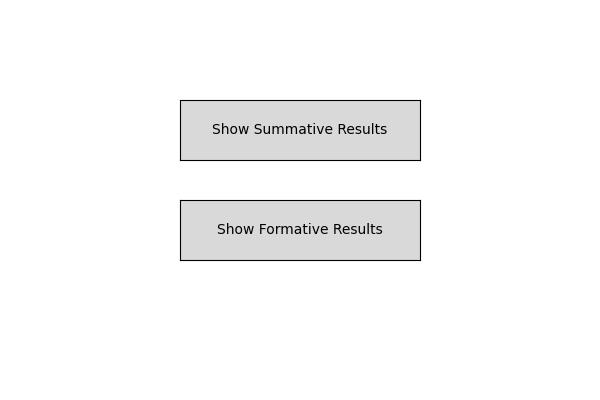

In [86]:
def show_summative(event):
    plot_table(sum_table, "Summative Test Results")


def show_formative(event):
    for table in formative_tables:
        plot_table(table, f"Formative Results: {table.split('_')[0]}")


btn_sum.on_clicked(show_summative)
btn_form.on_clicked(show_formative)

plt.show()
